In [35]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
issues = pd.read_csv('Issue Data Topic.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'comments', 'number', 'title', 'locked', 'state', 'topic'])
issues


,repo_id,id,comments,number,title,locked,state,topic
0,28027226,184325122,0,14,Back to multiple platform-specific impl classes,False,closed,-1
1,28027226,126477054,0,13,Impossible to add/remove components/nodes insi...,False,closed,-1
2,28027226,125155660,0,12,Factory methods,False,closed,-1
3,28027226,115748487,0,11,Finish with Skybox as a fully built-in component,False,closed,-1
4,28027226,115746573,0,10,Rename script enums,False,closed,-1
...,...,...,...,...,...,...,...,...
29894,7431427,10794019,4,5,Add WolfET Decal Projector code,False,closed,-1
29895,7431427,10793969,1,4,Support Sending Server Game Stats to Master Se...,False,open,-1
29896,7431427,10793903,1,3,Add Demo State Cgame System Calls,False,closed,-1
29897,7431427,10793844,6,2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed,-1


In [36]:
issues.topic.unique()

array([-1,  3,  0,  1,  2,  4], dtype=int64)

In [37]:
issues.query('topic != -1')

,repo_id,id,comments,number,title,locked,state,topic
8,28027226,115659045,0,6,Update camera cache when camera rendering orde...,False,closed,3
19,81228872,207297785,0,1,camera support,True,closed,3
20,150993369,792711652,5,225,Changing text using set_content() has a chance...,False,closed,0
24,150993369,785734973,6,219,SoundInstace.stop() doesn't work,False,closed,0
37,150993369,673074144,2,200,Add docs/examples for using a camera with a ca...,False,closed,0
...,...,...,...,...,...,...,...,...
29866,7431427,13561179,1,33,BSPC: Loading BSPs from pk3s doesn't work,False,closed,0
29878,7431427,12358671,1,21,Combain Cgame and UI system calls,False,closed,3
29881,7431427,12004020,0,18,Add User Profile Support,False,open,2
29890,7431427,11598453,0,9,Add trap_GetNews UI system call,False,open,3


In [38]:
issues.describe()

,repo_id,id,comments,number,topic
count,2.989900e+04,2.989900e+04,29899.000000,29899.000000,29899.000000
mean,6.748916e+07,3.755877e+08,2.762066,374.526874,-0.456069
std,6.776820e+07,2.124645e+08,5.487790,456.576283,1.196426
min,1.182756e+06,1.326569e+06,0.000000,1.000000,-1.000000
25%,1.431899e+07,2.023521e+08,0.000000,54.000000,-1.000000
50%,4.520265e+07,3.722620e+08,1.000000,188.000000,-1.000000
75%,1.053816e+08,5.533272e+08,3.000000,531.000000,-1.000000
max,3.290342e+08,7.957906e+08,246.000000,2446.000000,4.000000


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('poster')
sns.set_palette('viridis')
sns.set_style('darkgrid')

Text(0.5, 0, 'Issue Number')

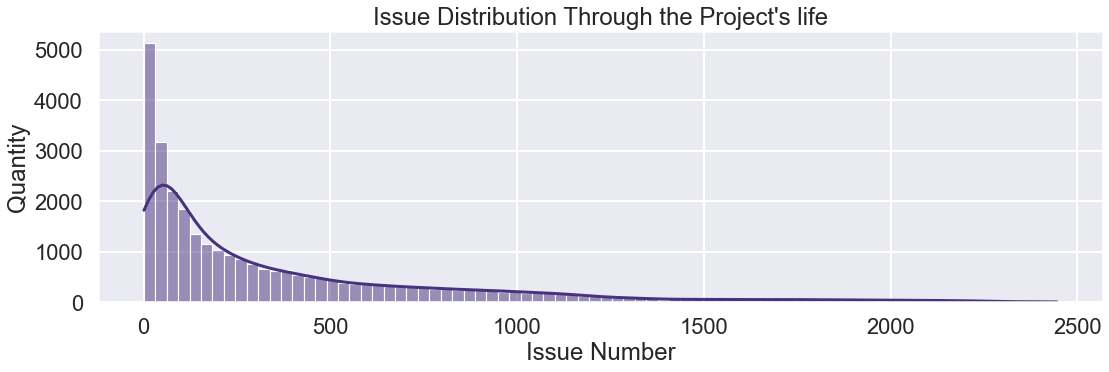

In [40]:
plt.figure(figsize=(18, 5))
ax = sns.histplot(data=issues, x='number', kde=True)
ax.set_title("Issue Distribution Through the Project's life")
ax.set_ylabel('Quantity')
ax.set_xlabel('Issue Number')


In [41]:
topics = pd.read_csv('Topics.csv')
topics


,Word 1,Prob 1,Word 2,Prob 2,Word 3,Prob 3,Word 4,Prob 4
0,editor,0.020,crash,0.013,work,0.008,using,0.007
1,editor,0.008,object,0.007,animation,0.007,objects,0.006
2,editor,0.008,file,0.006,example,0.006,build,0.005
3,editor,0.014,camera,0.006,system,0.006,implement,0.005
4,build,0.012,bug,0.008,editor,0.006,linux,0.006


In [42]:
topics.describe()

,Prob 1,Prob 2,Prob 3,Prob 4
count,5.00000,5.000000,5.000000,5.000000
mean,0.01240,0.008000,0.006600,0.005800
std,0.00498,0.002915,0.000894,0.000837
min,0.00800,0.006000,0.006000,0.005000
25%,0.00800,0.006000,0.006000,0.005000
50%,0.01200,0.007000,0.006000,0.006000
75%,0.01400,0.008000,0.007000,0.006000
max,0.02000,0.013000,0.008000,0.007000


In [43]:
mean = [topics['Prob 1'].mean(), topics['Prob 2'].mean(),
        topics['Prob 3'].mean(), topics['Prob 4'].mean()]
min = [topics['Prob 1'].min(), topics['Prob 2'].min(),
       topics['Prob 3'].min(), topics['Prob 4'].min()]
max = [topics['Prob 1'].max(), topics['Prob 2'].max(),
       topics['Prob 3'].max(), topics['Prob 4'].max()]


[Text(0, 0, 'Word 1'),
 Text(1, 0, 'Word 2'),
 Text(2, 0, 'Word 3'),
 Text(3, 0, 'Word 4')]

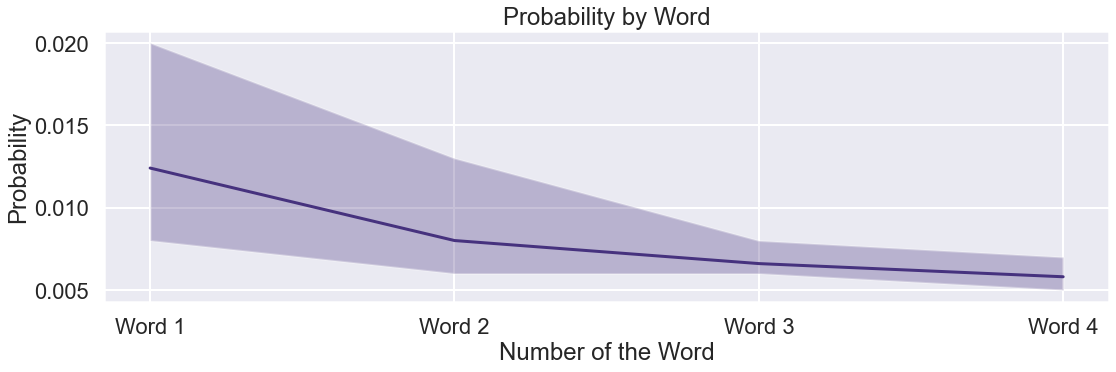

In [50]:
plt.figure(figsize=(18, 5))
ax = sns.lineplot(data=mean)
ax.fill_between(range(4), min, max, alpha=0.3)
ax.set_title('Probability by Word')
ax.set_ylabel('Probability')
ax.set_xlabel('Number of the Word')
ax.set_xticks(range(4))
ax.set_xticklabels(['Word 1', 'Word 2', 'Word 3',
                   'Word 4'])


[]

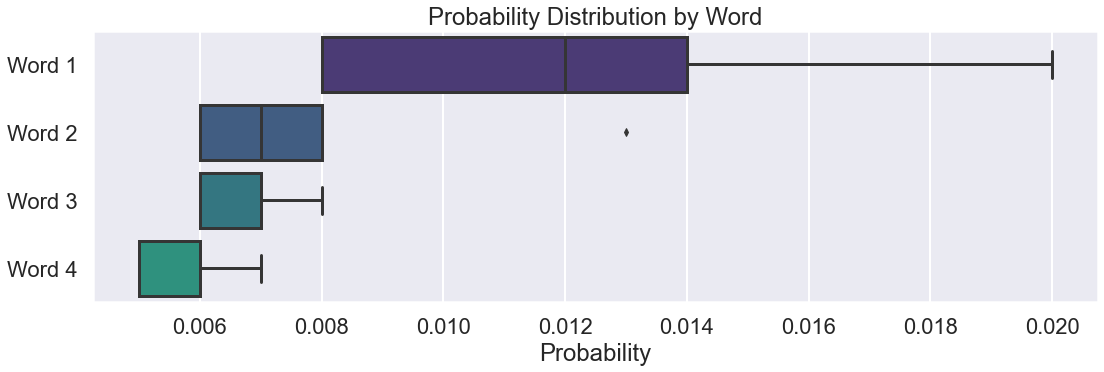

In [45]:
plt.figure(figsize=(18, 5))
ax = sns.boxplot(data=topics, orient='h')
ax.set_title('Probability Distribution by Word')
ax.set_xlabel('Probability')
ax.set_yticklabels(['Word 1', 'Word 2', 'Word 3',
                   'Word 4'])
ax.plot()
